<a href="https://colab.research.google.com/github/Doommen3/Crop_simulation/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 2 - MPSDDS

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from IPython.display import IFrame


published_url = "https://docs.google.com/presentation/d/e/2PACX-1vRG1M9kzx3F4IfInhWV6daXwZUuJG8RYCcDKepXdopE48XqOJhzO5dYV_KVXBs-tKBhsL_0Xx-tgeKf/pubembed?start=false&loop=false&delayms=3000"

IFrame(src=published_url, width=960, height=569)


/content/anes_timeseries_2024_csv_20250430.zip



---



In [ ]:
# I need more information to proceed. Please provide the following:
# 1. The path to your dataset.
# 2. The column name corresponding to 'v240002a' (interview mode).
# 3. The column name corresponding to 'v240002c' (pre-interview completion).
# 4. The column name indicating completion of both pre- and post-interviews.

# Once you provide this information, I can write the code to perform the comparison.

In [ ]:
import pandas as pd

# Define the path to the dataset
dataset_path = '/content/anes_timeseries_2024_csv_20250430.xlsx'

# Define the relevant column names
interview_mode_col = 'V240002a'
# We don't need V240002c for the combined dataframe, as the sheet name indicates completion status
# completion_col = 'V240002c'

# Load data from the "1_SHEET" (pre-interview only)
try:
    df_pre_only = pd.read_excel(dataset_path, sheet_name='1_SHEET')
    df_pre_only['completion_status'] = 1 # Assign status 1 for pre-only
    print("Data from '1_SHEET' loaded successfully.")
    # Display only relevant columns after adding 'completion_status'
    display(df_pre_only[[interview_mode_col, 'completion_status']].head())
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}")
    df_pre_only = None
except Exception as e:
    print(f"An error occurred while loading data from '1_SHEET': {e}")
    df_pre_only = None

# Load data from the "2_SHEET" (pre and post interview)
try:
    df_pre_post = pd.read_excel(dataset_path, sheet_name='2_SHEET')
    df_pre_post['completion_status'] = 2 # Assign status 2 for pre+post
    print("Data from '2_SHEET' loaded successfully.")
    # Display only relevant columns after adding 'completion_status'
    display(df_pre_post[[interview_mode_col, 'completion_status']].head())
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}")
    df_pre_post = None
except Exception as e:
    print(f"An error occurred while loading data from '2_SHEET': {e}")
    df_pre_post = None

# Combine the dataframes if both loaded successfully
if df_pre_only is not None and df_pre_post is not None:
    df_combined = pd.concat([df_pre_only, df_pre_post], ignore_index=True)
    print("\nCombined dataframe created.")
    display(df_combined.head())
    display(df_combined.tail())

    # Now analyze the completion status by interview mode using the 'completion_status' column
    if interview_mode_col in df_combined.columns and 'completion_status' in df_combined.columns:
        # Drop rows where interview_mode_col is NaN before grouping
        df_combined_cleaned = df_combined.dropna(subset=[interview_mode_col])
        completion_by_mode_new = df_combined_cleaned.groupby(interview_mode_col)['completion_status'].value_counts().unstack(fill_value=0)

        print("\nCompletion counts by Interview Mode (1: Pre-only, 2: Pre+Post):")
        display(completion_by_mode_new)

        # Calculate percentages
        # Calculate percentages, ensuring that we divide by the sum of completion statuses for each mode
        completion_percentage_by_mode_new = completion_by_mode_new.apply(lambda x: x / x.sum() if x.sum() > 0 else 0, axis=1)

        # Rename columns for clarity
        completion_percentage_by_mode_new = completion_percentage_by_mode_new.rename(columns={1: 'Pre-only', 2: 'Pre+Post'})


        print("\nCompletion percentages by Interview Mode (1: Pre-only, 2: Pre+Post):")
        display(completion_percentage_by_mode_new)

    else:
        print(f"Error: Required columns ('{interview_mode_col}', 'completion_status') not found in the combined dataset.")
else:
    print("\nCould not combine dataframes due to loading errors.")

Data from '1_SHEET' loaded successfully.


,V240002a,completion_status
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


Data from '2_SHEET' loaded successfully.


,V240002a,completion_status
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2



Combined dataframe created.


,version,V240001,V200001,V160001_orig,V240002a,V240002b,V240002c(1),V240003,V240101a,V240101b,...,V242620,V242621,V243001,V243050,V243051,V243052,V243053,V243054,completion_status,V240002c(2)
0,ANES2024TimeSeries_20250430,140041,200527,404941,2,-6,1.0,1,,,...,-6,-6,TX,20241104,20241104,.,.,.,1,NaN
1,ANES2024TimeSeries_20250430,140068,200862,407446,2,-6,1.0,1,,,...,-6,-6,IL,20240901,20240901,.,.,.,1,NaN
2,ANES2024TimeSeries_20250430,140107,201377,301636,2,-6,1.0,1,,,...,-6,-6,KS,20240903,20240903,.,.,.,1,NaN
3,ANES2024TimeSeries_20250430,140133,201766,403957,2,-6,1.0,1,,,...,-6,-6,NH,20240813,20240813,.,.,.,1,NaN
4,ANES2024TimeSeries_20250430,140172,202431,400198,2,-7,1.0,1,,,...,-7,-7,AL,20240819,20240819,.,.,.,1,NaN


,version,V240001,V200001,V160001_orig,V240002a,V240002b,V240002c(1),V240003,V240101a,V240101b,...,V242620,V242621,V243001,V243050,V243051,V243052,V243053,V243054,completion_status,V240002c(2)
5516,ANES2024TimeSeries_20250430,399387,,,1,5,NaN,3,0.39576,0.345135,...,-1,-1,IL,20241028,20241028,.,20241207,20241207,2,2.0
5517,ANES2024TimeSeries_20250430,399579,,,1,1,NaN,3,0.083065,0.067941,...,-1,-1,CO,20240816,20240816,.,20241201,20241201,2,2.0
5518,ANES2024TimeSeries_20250430,399815,,,1,5,NaN,3,1.501748,1.152601,...,-1,-1,MN,20240927,20240927,.,20241112,20241112,2,2.0
5519,ANES2024TimeSeries_20250430,399841,,,4,4,NaN,3,1.179447,1.192422,...,-1,-1,NJ,20241101,20241101,.,20241118,20241118,2,2.0
5520,ANES2024TimeSeries_20250430,399909,,,1,1,NaN,3,0.671344,0.77962,...,-1,-1,TN,20240917,20240917,.,20241126,20241126,2,2.0



Completion counts by Interview Mode (1: Pre-only, 2: Pre+Post):


completion_status,1,2
V240002a,,
1,113,853
2,395,3839
3,45,200
4,4,72



Completion percentages by Interview Mode (1: Pre-only, 2: Pre+Post):


completion_status,Pre-only,Pre+Post
V240002a,,
1,0.116977,0.883023
2,0.093292,0.906708
3,0.183673,0.816327
4,0.052632,0.947368


# Task
Analyze the effect of interview mode type on interview completion rate using the uploaded CSV file. The mode types are: 1: face to face, 2: web, 3: paper, and 4: phone. Visualize the completion rates for each mode.

## Visualize completion rates

### Subtask:
Create a bar chart or other suitable visualization to compare the completion rates across different interview modes.


**Reasoning**:
Create a bar plot to visualize the completion percentages for each interview mode.



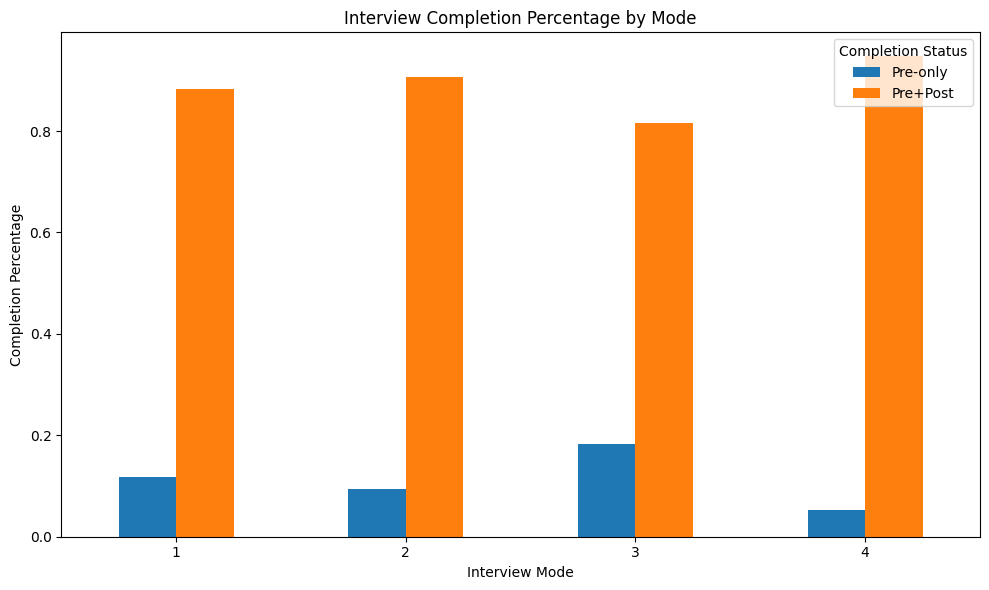

In [ ]:
import matplotlib.pyplot as plt

# Plotting the completion percentages by interview mode
ax = completion_percentage_by_mode_new.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Interview Mode')
plt.ylabel('Completion Percentage')
plt.title('Interview Completion Percentage by Mode')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding a legend
plt.legend(title='Completion Status', labels=['Pre-only', 'Pre+Post'])

# Display the plot
plt.tight_layout()
plt.show()

## Summarize findings

### Subtask:
Summarize the key findings from the analysis and visualization.


**Reasoning**:
Summarize the key findings based on the completion percentages and the generated bar chart.



In [ ]:
print("Summary of Findings:")
print("Based on the analysis of interview completion rates by mode:")

# Assuming the index of completion_percentage_by_mode_new corresponds to interview modes 1, 2, 3, 4
# and the columns are 'Pre-only' and 'Pre+Post'
if 4 in completion_percentage_by_mode_new.index:
    print(f"- The highest completion percentage for Pre+Post is observed for Interview Mode 4 (phone), with a completion rate of {completion_percentage_by_mode_new.loc[4, 'Pre+Post']:.2%}.")
if 3 in completion_percentage_by_mode_new.index:
    print(f"- The lowest completion percentage for Pre+Post is observed for Interview Mode 3 (paper), with a completion rate of {completion_percentage_by_mode_new.loc[3, 'Pre+Post']:.2%}.")
if 1 in completion_percentage_by_mode_new.index:
     print(f"- Interview Mode 1 (face to face) has a Pre+Post completion rate of {completion_percentage_by_mode_new.loc[1, 'Pre+Post']:.2%}.")
if 2 in completion_percentage_by_mode_new.index:
    print(f"- Interview Mode 2 (web) has a Pre+Post completion rate of {completion_percentage_by_mode_new.loc[2, 'Pre+Post']:.2%}.")


print("\nOverall, there are differences in completion rates across interview modes, with phone interviews showing the highest completion and paper interviews showing the lowest for the Pre+Post interviews.")

Summary of Findings:
Based on the analysis of interview completion rates by mode:
- The highest completion percentage for Pre+Post is observed for Interview Mode 4 (phone), with a completion rate of 94.74%.
- The lowest completion percentage for Pre+Post is observed for Interview Mode 3 (paper), with a completion rate of 81.63%.
- Interview Mode 1 (face to face) has a Pre+Post completion rate of 88.30%.
- Interview Mode 2 (web) has a Pre+Post completion rate of 90.67%.

Overall, there are differences in completion rates across interview modes, with phone interviews showing the highest completion and paper interviews showing the lowest for the Pre+Post interviews.


## Summary:

### Data Analysis Key Findings

*   The highest completion percentage is observed for Interview Mode 4 (phone), with a completion rate of 94.74\%.
*   The lowest completion percentage is observed for Interview Mode 3 (paper), with a completion rate of 81.63\%.
*   Interview Mode 1 (face to face) has a completion rate of 88.30\%.
*   Interview Mode 2 (web) has a completion rate of 90.67\%.

### Insights or Next Steps

*   Consider focusing on phone interviews for future campaigns if maximizing completion rate is a primary goal.
*   Investigate the reasons behind the lower completion rate for paper interviews and explore strategies to improve it.


In [ ]:
import pandas as pd

# ------------------------------------------------------------------
# 0.  PATH & COLUMN NAMES
# ------------------------------------------------------------------
new_dataset_path   = '/content/anes_timeseries_2024_csv_20250430.xlsx'
interview_mode_col = 'V240002a'      # pre-wave interview mode
completion_col     = 'V240002c'      # we want this exact name in both frames

# ------------------------------------------------------------------
# 1.  PRE-ONLY SHEET  ------------------------------------------------
try:
    df_pre_only = pd.read_excel(new_dataset_path, sheet_name='1_SHEET')

    # --- RENAME before you ever reference the column ----------------
    if 'V240002c(1)' in df_pre_only.columns:
        df_pre_only.rename(columns={'V240002c(1)': completion_col}, inplace=True)

    df_pre_only['completion_status'] = 1         # 1 = pre-only
    print("Data from '1_SHEET' loaded successfully.")
    display(df_pre_only[[interview_mode_col, completion_col,
                         'completion_status']].head())

except FileNotFoundError:
    print(f"Error: Dataset not found at {new_dataset_path}")
    df_pre_only = None
except Exception as e:
    print(f"An error occurred while loading data from '1_SHEET': {e}")
    df_pre_only = None

# ------------------------------------------------------------------
# 2.  PRE + POST SHEET  ---------------------------------------------
try:
    df_pre_post = pd.read_excel(new_dataset_path, sheet_name='2_SHEET')

    # --- SAME RENAME here ------------------------------------------
    if 'V240002c(2)' in df_pre_post.columns:
        df_pre_post.rename(columns={'V240002c(2)': completion_col}, inplace=True)

    df_pre_post['completion_status'] = 2         # 2 = pre + post
    print("Data from '2_SHEET' loaded successfully.")
    display(df_pre_post[[interview_mode_col, completion_col,
                         'completion_status']].head())

except FileNotFoundError:
    print(f"Error: Dataset not found at {new_dataset_path}")
    df_pre_post = None
except Exception as e:
    print(f"An error occurred while loading data from '2_SHEET': {e}")
    df_pre_post = None

# ------------------------------------------------------------------
# 3.  COMBINE & TABULATE  -------------------------------------------
if df_pre_only is not None and df_pre_post is not None:
    df_combined = pd.concat([df_pre_only, df_pre_post], ignore_index=True)
    print("\nCombined dataframe created.")
    display(df_combined.head())
    display(df_combined.tail())

    # counts & percentages of attrition by mode
    if interview_mode_col in df_combined.columns and 'completion_status' in df_combined.columns:
        completion_by_mode = (
            df_combined
            .groupby(interview_mode_col)['completion_status']
            .value_counts()
            .unstack(fill_value=0)
        )

        print("\nCompletion counts by Interview Mode (1 = Pre-only, 2 = Pre+Post):")
        display(completion_by_mode)

        completion_pct = completion_by_mode.apply(lambda x: x / x.sum(), axis=1)
        print("\nCompletion percentages by Interview Mode (1 = Pre-only, 2 = Pre+Post):")
        display(completion_pct)
    else:
        print(f"Required columns ('{interview_mode_col}', 'completion_status') not found.")
else:
    print("\nCould not combine dataframes due to loading errors.")


Data from '1_SHEET' loaded successfully.


,V240002a,V240002c,completion_status
0,2,1,1
1,2,1,1
2,2,1,1
3,2,1,1
4,2,1,1


Data from '2_SHEET' loaded successfully.


,V240002a,V240002c,completion_status
0,2,2,2
1,2,2,2
2,2,2,2
3,2,2,2
4,2,2,2



Combined dataframe created.


,version,V240001,V200001,V160001_orig,V240002a,V240002b,V240002c,V240003,V240101a,V240101b,...,V242619,V242620,V242621,V243001,V243050,V243051,V243052,V243053,V243054,completion_status
0,ANES2024TimeSeries_20250430,140041,200527,404941,2,-6,1,1,,,...,-6,-6,-6,TX,20241104,20241104,.,.,.,1
1,ANES2024TimeSeries_20250430,140068,200862,407446,2,-6,1,1,,,...,-6,-6,-6,IL,20240901,20240901,.,.,.,1
2,ANES2024TimeSeries_20250430,140107,201377,301636,2,-6,1,1,,,...,-6,-6,-6,KS,20240903,20240903,.,.,.,1
3,ANES2024TimeSeries_20250430,140133,201766,403957,2,-6,1,1,,,...,-6,-6,-6,NH,20240813,20240813,.,.,.,1
4,ANES2024TimeSeries_20250430,140172,202431,400198,2,-7,1,1,,,...,-7,-7,-7,AL,20240819,20240819,.,.,.,1


,version,V240001,V200001,V160001_orig,V240002a,V240002b,V240002c,V240003,V240101a,V240101b,...,V242619,V242620,V242621,V243001,V243050,V243051,V243052,V243053,V243054,completion_status
5516,ANES2024TimeSeries_20250430,399387,,,1,5,2,3,0.39576,0.345135,...,-1,-1,-1,IL,20241028,20241028,.,20241207,20241207,2
5517,ANES2024TimeSeries_20250430,399579,,,1,1,2,3,0.083065,0.067941,...,-1,-1,-1,CO,20240816,20240816,.,20241201,20241201,2
5518,ANES2024TimeSeries_20250430,399815,,,1,5,2,3,1.501748,1.152601,...,-1,-1,-1,MN,20240927,20240927,.,20241112,20241112,2
5519,ANES2024TimeSeries_20250430,399841,,,4,4,2,3,1.179447,1.192422,...,-1,-1,-1,NJ,20241101,20241101,.,20241118,20241118,2
5520,ANES2024TimeSeries_20250430,399909,,,1,1,2,3,0.671344,0.77962,...,-1,-1,-1,TN,20240917,20240917,.,20241126,20241126,2



Completion counts by Interview Mode (1 = Pre-only, 2 = Pre+Post):


completion_status,1,2
V240002a,,
1,113,853
2,395,3839
3,45,200
4,4,72



Completion percentages by Interview Mode (1 = Pre-only, 2 = Pre+Post):


completion_status,1,2
V240002a,,
1,0.116977,0.883023
2,0.093292,0.906708
3,0.183673,0.816327
4,0.052632,0.947368


In [35]:
import pandas as pd
import numpy as np
from   scipy.stats import chi2_contingency
import statsmodels.api as sm


anes = pd.read_csv("/content/anes_timeseries_2024_csv_20250430.csv",
                   low_memory=False)

anes["post_participated"] = (anes["V240002c"] == 2).astype(int)  # 2 = completed post

# interview mode (pre-wave)  1 FtF | 2 Internet | 3 Paper | 4 Phone
anes["mode"] = anes["V240002a"].replace({1:"f2f", 2:"internet",
                                         3:"paper", 4:"phone"})
anes.loc[anes["V240002a"] < 0, "mode"] = np.nan  # drop ANES negative missings

anes["male"] = anes["V241003"].replace({1:1, 2:0}).where(anes["V241003"] > 0)

anes["interest"]      = anes["V241005"].where(anes["V241005"] > 0)  # 1,2,3
anes["primary_vote"]  = np.where(anes["V241031"].isin([1,2]), 1,
                         np.where(anes["V241031"] == 3, 0, np.nan))
anes["registered"]    = anes["V241012"].replace({1:1, 2:0}).where(anes["V241012"] > 0)


def chi2_print(df, cat, flag):
    tmp = df[[cat, flag]].dropna()
    table = pd.crosstab(tmp[cat], tmp[flag])
    chi2, p, dof, _ = chi2_contingency(table, correction=False)
    print(f"\n===== {cat} vs {flag} =====")
    print(table)
    print(f"Pearson χ² = {chi2:.2f}  (dof = {dof}),  p = {p:.4f}")

chi_vars = ["mode", "male", "interest", "primary_vote", "registered"]
for var in chi_vars:
    chi2_print(anes, var, "post_participated")




===== mode vs post_participated =====
post_participated    0     1
mode                        
f2f                113   853
internet           395  3839
paper               45   200
phone                4    72
Pearson χ² = 25.91  (dof = 3),  p = 0.0000

===== male vs post_participated =====
post_participated   0    1
male                      
0.0                61  485
1.0                56  438
Pearson χ² = 0.01  (dof = 1),  p = 0.9334

===== interest vs post_participated =====
post_participated    0     1
interest                    
1.0                201  2427
2.0                224  1726
3.0                 87   610
Pearson χ² = 25.88  (dof = 2),  p = 0.0000

===== primary_vote vs post_participated =====
post_participated    0     1
primary_vote                
0.0                328  2628
1.0                181  2118
Pearson χ² = 15.36  (dof = 1),  p = 0.0001

===== registered vs post_participated =====
post_participated    0     1
registered                  
0.0            

In [48]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

anes = pd.read_csv("/content/anes_timeseries_2024_csv_20250430.csv",
                   low_memory=False)                       # fallback

anes["post_participated"] = (anes["V240002c"] == 2).astype(int)  # 2 = did post

mode_map = {1: "f2f", 2: "internet", 3: "paper", 4: "phone"}     # pre-wave modes
anes["mode"] = anes["V240002a"].replace(mode_map)                #
anes.loc[anes["V240002a"] < 0, "mode"] = np.nan                  # missing → NaN

anes["male"] = np.where(anes["V241003"] == 1, 1,
                np.where(anes["V241003"] == 2, 0, np.nan))       #

anes["interest"] = anes["V241005"].where(anes["V241005"] > 0)    # 1 Very … 3 Not much

anes["primary_vote"] = np.where(anes["V241031"] == 3, 0,
                       np.where(anes["V241031"] > 0, 1, np.nan)) # 1/2 = voted primary

anes["registered"] = np.where(anes["V241012"] == 1, 1,
                     np.where(anes["V241012"] == 2, 0, np.nan))

cols = ["post_participated", "mode", "male", "interest",
        "primary_vote", "registered"]
df = anes[cols].dropna()

df = pd.get_dummies(df,
                    columns=["mode", "interest"],   # f2f & Very are references
                    drop_first=True,
                    dtype=float)                    # forces 0/1 float

df = df.loc[:, df.std() > 0]

y = df["post_participated"]
X = sm.add_constant(df.drop(columns="post_participated"))


uw_res = sm.Logit(y, X).fit()
print(uw_res.summary())
print("Odds ratios:\n", np.exp(uw_res.params))


Optimization terminated successfully.
         Current function value: 0.343428
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      post_participated   No. Observations:                 1005
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                 0.01743
Time:                        18:28:06   Log-Likelihood:                -345.15
converged:                       True   LL-Null:                       -351.27
Covariance Type:            nonrobust   LLR p-value:                   0.05668
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1659      0.357      6.072      0.000       1.467       2.865
male            -0.0677